# Analise da Cafelura

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
cafelura = pd.read_csv(r'C:\Users\walas\OneDrive\Área de Trabalho\Cursos DataScience\Curso 7\dados\material+curso+-+Time+Series\material curso - Time Series\cafelura.csv')

In [3]:
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [4]:
cafelura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [5]:
cafelura.mes = pd.to_datetime(cafelura.mes)

In [6]:
cafelura.mes.head()

0   2017-01-31
1   2017-02-28
2   2017-03-31
3   2017-04-30
4   2017-05-31
Name: mes, dtype: datetime64[ns]

In [7]:
def plotar (titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

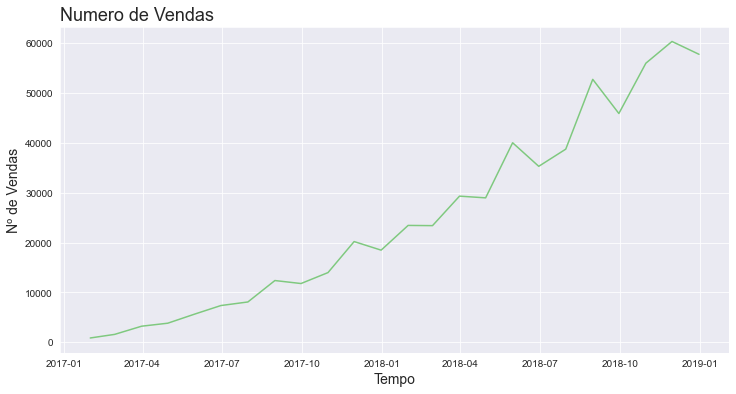

In [8]:
plotar('Numero de Vendas', 'Tempo', 'Nº de Vendas', 'mes', 'vendas', cafelura)

## Normalizando as vendas

In [9]:
quantidade_fim_de_semana = pd.read_csv(r'C:\Users\walas\OneDrive\Área de Trabalho\Cursos DataScience\Curso 7\dados\material+curso+-+Time+Series\material curso - Time Series\dias_final_de_semana.csv')

In [10]:
quantidade_fim_de_semana.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [12]:
quantidade_fim_de_semana.quantidade_de_dias.values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [14]:
cafelura['vendas_normalizadas']= cafelura['vendas'] / quantidade_fim_de_semana['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


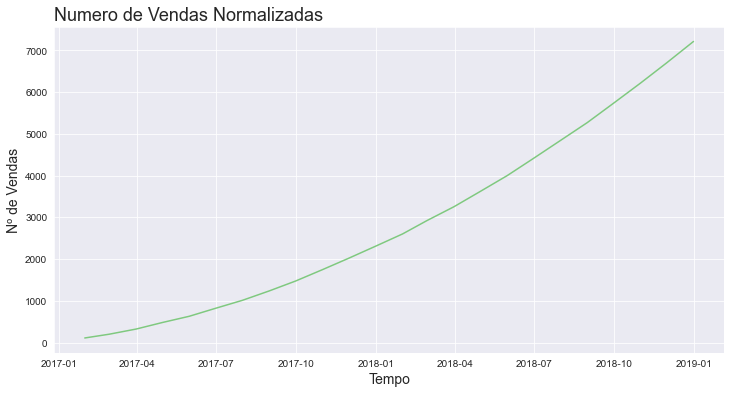

In [15]:
plotar('Numero de Vendas Normalizadas', 'Tempo', 'Nº de Vendas', 'mes', 'vendas_normalizadas', cafelura)

### Comparacao

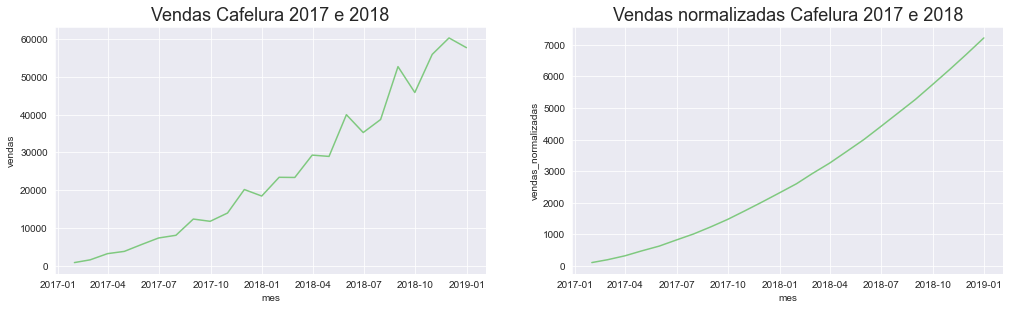

In [21]:
plt.figure(figsize=(17,10))
ax=plt.subplot(2,2,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax=plt.subplot(2,2,2)
ax.set_title('Vendas normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax 